# Código para clonar o repositório da Uninter e baixar o dataset

In [13]:
import requests
from git import Repo
import os

'''
# URL do repositório Git
repo_url = "https://github.com/N-CPUninter/NLP.git"

# Diretório onde o repositório será clonado
clone_dir = os.path.join('uninterRepo')  # Você pode alterar o nome ou o caminho

# Clonando o repositório
Repo.clone_from(repo_url, clone_dir)
'''

'''
# URL do dataset bruto no GitHub
url = "https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv"

# Baixa arquivo
response = requests.get(url)

# Salva arquivo localmente
with open("data/corpora/preprocessed.csv", "wb") as file:
    file.write(response.content)
'''

<git.repo.base.Repo 'c:\\Users\\marco\\OneDrive\\.Tecnologia_da_Informacao\\.Uninter\\Processamento de Linguagem Natural\\fakeNewsClassifier\\uninterRepo\\uninterRepo_test\\.git'>

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [4]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from funcoes_auxiliares import gerar_nuvem_palavras
nltk.download("all")
import unicodedata
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter


# Função de limpeza e pré-processamento de texto
def clean_text(text, max_len):
    stop_words = set(stopwords.words('portuguese'))
    stemmer = RSLPStemmer()
    # Tokenização
    tokens = word_tokenize(text)
    # Remove acentos e números, converter para minúsculas
    tokens = [unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower() for token in tokens if token.isalpha()]
    # Remove stopwords e pontuação
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # Aplica stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Trunca para o comprimento máximo
    truncated_tokens = tokens[:max_len]
    # Remontar a string
    return ' '.join(truncated_tokens)


# Importa os dados brutos
data_path = os.path.join('data', 'corpora', 'preprocessed.csv')
df = pd.read_csv(data_path, usecols=['label', 'preprocessed_news'])

# Determina o comprimento máximo com base nas médias de notícias verdadeiras e falsas. Utilizado no truncamento
avg_len_true = df[df['label'] == 'true']['preprocessed_news'].str.split().apply(len).mean()
avg_len_fake = df[df['label'] == 'fake']['preprocessed_news'].str.split().apply(len).mean()
max_len = int(min(avg_len_true, avg_len_fake))

# Aplica pré-processamento dos dados
df['cleaned_news'] = df['preprocessed_news'].apply(lambda x: clean_text(x, max_len))

# Configuração do TfidfVectorizer para n-gramas de 1 a 3 palavras
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustando e transformando os textos pré-processados em uma matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_news'])

# Dividindo os dados em treinamento e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,
                                                    df['label'],
                                                    test_size=0.25,
                                                    random_state=42
)

# Treinamento do modelo de regressão logística
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_proba = logistic_model.predict_proba(X_test)

# Avaliação do desempenho
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia (calculada pela função do sklearn): {accuracy:.0%}")
print("\nRelatório de Classificação:\n", report)
print("RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\marco\AppData\Roaming\nltk_data...
[

Acurácia (calculada pela função do sklearn): 89%

Relatório de Classificação:
               precision    recall  f1-score   support

        fake       0.90      0.89      0.90       915
        true       0.89      0.90      0.89       885

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800

RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


   * Um total de 15164 tokens foram computadas a partir do conjunto de dados.



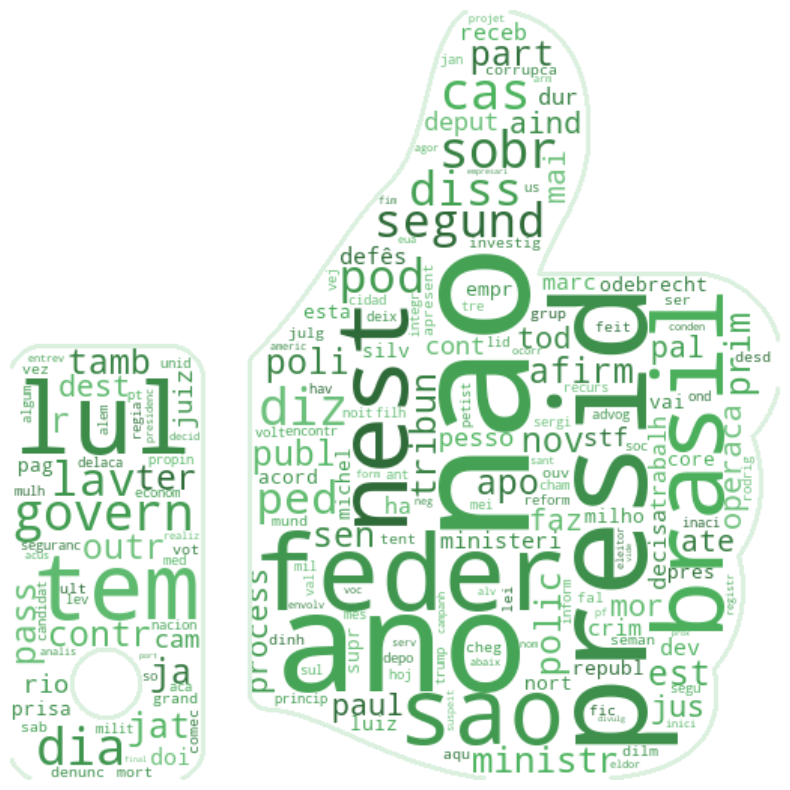

(<wordcloud.wordcloud.WordCloud at 0x1e823b258e0>, 15164)

In [2]:
#RU: 4181946
# Separando os textos verdadeiros
true_texts = df[df['label'] == 'true']['cleaned_news']

# Gerando o dicionário de frequências para os textos verdadeiros
true_text_tokens = ' '.join(true_texts).split()
dic_de_frequencias_textos_verdadeiras = dict(Counter(true_text_tokens))

# Chamando a função para gerar a nuvem de palavras usando a máscara thumbs_up
gerar_nuvem_palavras(arquivo_mascara="thumbs_up_mask.png",
                     dicionario_tokens_e_frequencia=dic_de_frequencias_textos_verdadeiras)


In [15]:
# Subset textos "true"
true_texts = df[df['label'] == 'true']['cleaned_news']

# TfidfVectorizer apenas nos textos rotulados como "true"
tfidf_vectorizer_true = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
tfidf_matrix_true = tfidf_vectorizer_true.fit_transform(true_texts)
vocabulario_true = tfidf_vectorizer_true.vocabulary_

# Contando a quantidade de palavras em cada termo:
unigramas_true = [termo for termo in vocabulario_true if len(termo.split()) == 1]
bigramas_true = [termo for termo in vocabulario_true if len(termo.split()) == 2]
trigramas_true = [termo for termo in vocabulario_true if len(termo.split()) == 3]

# Exiba as contagens
print("Textos classificados como TRUE:")
print(f"Quantidade de palavras (unigramas) usadas: {len(unigramas_true)}")
print(f"Quantidade de bigramas usadas: {len(bigramas_true)}")
print(f"Quantidade de trigramas usadas: {len(trigramas_true)}")
print("RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946")

Textos classificados como TRUE:
Quantidade de palavras (unigramas) usadas: 3154
Quantidade de bigramas usadas: 1495
Quantidade de trigramas usadas: 351
RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

   * Um total de 13118 tokens foram computadas a partir do conjunto de dados.



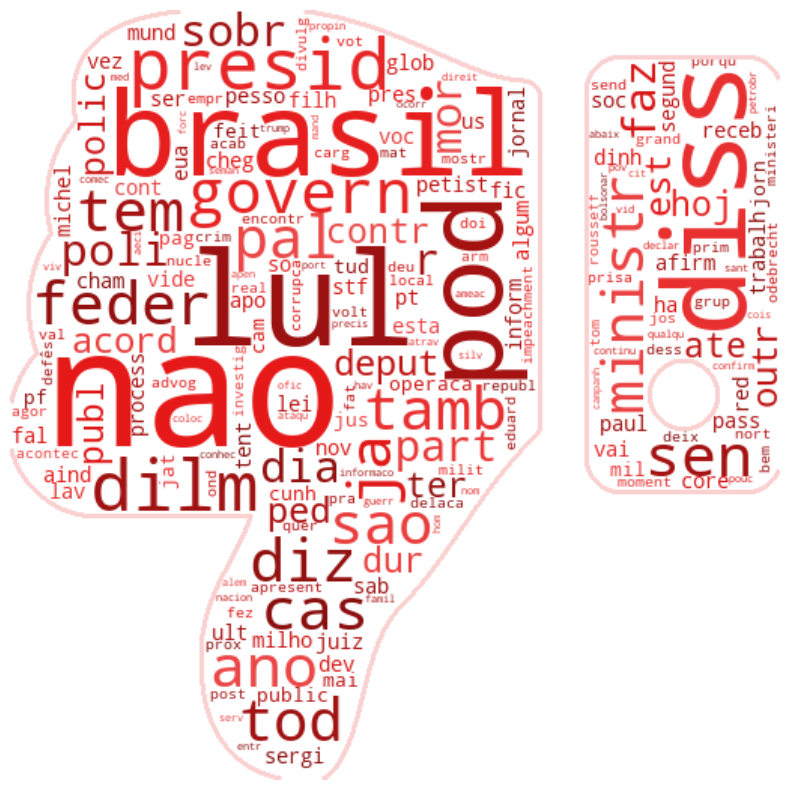

RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946


In [9]:
# Separando os textos falsos
fake_texts = df[df['label'] == 'fake']['cleaned_news']

# Gerando o dicionário de frequências para os textos falsos
fake_text_tokens = ' '.join(fake_texts).split()
dic_de_frequencias_textos_falsos = dict(Counter(fake_text_tokens))

# Chamando a função para gerar a nuvem de palavras usando a máscara thumbs_down
gerar_nuvem_palavras(arquivo_mascara="thumbs_down_mask.png",
                     dicionario_tokens_e_frequencia=dic_de_frequencias_textos_falsos)

print("RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946")

In [14]:
# Subset textos "fake"
fake_texts = df[df['label'] == 'fake']['cleaned_news']

# TfidfVectorizer apenas nos textos rotulados como "fake"
tfidf_vectorizer_fake = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
tfidf_matrix_fake = tfidf_vectorizer_fake.fit_transform(fake_texts)
vocabulario_fake = tfidf_vectorizer_fake.vocabulary_

# Contando a quantidade de palavras em cada termo:
unigramas_fake = [termo for termo in vocabulario_fake if len(termo.split()) == 1]
bigramas_fake = [termo for termo in vocabulario_fake if len(termo.split()) == 2]
trigramas_fake = [termo for termo in vocabulario_fake if len(termo.split()) == 3]


print('Textos classificados como FAKE:')
print(f"Quantidade de palavras (unigramas) usadas: {len(unigramas_fake)}")
print(f"Quantidade de bigramas usadas: {len(bigramas_fake)}")
print(f"Quantidade de trigramas usadas: {len(trigramas_fake)}")
print("RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946")

Textos classificados como FAKE:
Quantidade de palavras (unigramas) usadas: 3363
Quantidade de bigramas usadas: 1477
Quantidade de trigramas usadas: 160
RU MARCOS VINÍCIUS SANTOS RAMOS: 4181946
